## This notebook contains code to plot ROC curve from the pickle files output by the evaluation scripts.

First we import the required packages

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib
# import seaborn
import sklearn
from sklearn import metrics
from sklearn.utils.multiclass import unique_labels

#### Now set the path to the pickle file that you want to plot ROC curve for

In [7]:
evaluation_pickle_file = '/home/capstone22/WildFIrePrediction/agni/evaluation_scripts/prediction_label_cali.pickle'

In [8]:
prediction_list, label_list = pickle.load(open(evaluation_pickle_file, 'rb'))

In [9]:
label_list = [x[0] for x in label_list]
label_array = np.array(label_list)
# threshold the labels to 1 and 0, 1 for fire and 0 for no fire
label_array[label_array > 0.0] = 1
label_array[label_array > 0.0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [10]:
prediction_array = np.array(prediction_list)

In [11]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true=label_array, y_score=prediction_array, drop_intermediate=True)

In [12]:
# set save_figure to true if you want to save the roc curve to disk
save_figure = False
# set filename and path to save figure
filename = './roc_curve_fig.png'

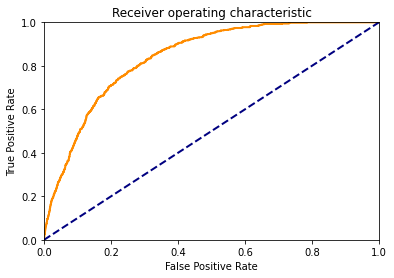

In [13]:
plt.figure()
lw = 2
# plt.plot(fpr, tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot(fpr, tpr, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
if save_figure:
    plt.savefig(filename, bbox='tight')
plt.show()

We can calculate the area under roc curve here

In [14]:
roc_auc = sklearn.metrics.auc(x=fpr, y=tpr)

In [15]:
roc_auc

0.8398206729647018